# Polish dataset for product matching

# General analysis

Loading up the dataset.

In [2]:
import pandas as pd
import json

file_path = r'C:\Users\Kinga\Desktop\iiad_magisterskie\2_sem\NLP\pl_wdc_napoje_small.json'
data_list = []
with open(file_path, 'r') as file:
    for line in file:
        # Load JSON data from each line
        json_data = json.loads(line)
        data_list.append(json_data)

df_nap = pd.json_normalize(data_list)


In [3]:

file_path = r'C:\Users\Kinga\Desktop\iiad_magisterskie\2_sem\NLP\pl_wdc_chemia_small.json'
data_list = []
with open(file_path, 'r') as file:
    for line in file:
        json_data = json.loads(line)
        data_list.append(json_data)

df_ch = pd.json_normalize(data_list)

In [4]:
import pandas as pd
import json

file_path = r'C:\Users\Kinga\Desktop\iiad_magisterskie\2_sem\NLP\pl_wdc_all_small.json'
data_list = []

with open(file_path, 'r') as file:
    for line in file:
        json_data = json.loads(line)
        data_list.append(json_data)

df = pd.json_normalize(data_list)



In [4]:
df.head()

,id_left,cluster_id_left,identifiers_left,title_left,description_left,brand_left,price_left,specTableContent_left,id_right,cluster_id_right,...,keyValuePairs_left.weight,keyValuePairs_right.amount,keyValuePairs_right.capacity,keyValuePairs_right.extras,keyValuePairs_right.image_url,keyValuePairs_right.ingredients,keyValuePairs_right.origin,keyValuePairs_right.storage,keyValuePairs_right.url,keyValuePairs_right.weight
0,2549,8001841376004,[{'EAN': ['8001841376004']}],lenor płyn do płukania tkanin sparkling bloom ...,płyn do płukania tkanin lenor zapewnia długotr...,lenor,14 99,amount 1 42 l capacity 1 42 l extras image_ur...,2549,8001841376004,...,waga brutto 1471,1 42 l,1 42 l,,https www frisco pl pid 119361 n lenor plyn do...,5 kationowe środki powierzchniowo czynne benz...,kraj pochodzenia czechy zapakowano w czechy,,https www frisco pl pid 119361 n lenor plyn do...,waga brutto 1471
1,6775,5900627090512,[{'EAN': ['5900627090512']}],woolite płyn do prania tkanin do kolorów z ker...,woolite płyn do prania tkanin do kolorów z ker...,,22 99,amount 3 6 l capacity 3 6 l extras image_url ...,2581,5900627090512,...,waga netto 3 6 l,3 6 l,3 6 l,,https www frisco pl pid 91325 n woolite mix co...,5 15 anionowe środki powierzchniowo czynne 5 n...,kraj pochodzenia produkt ue,,https www frisco pl pid 91325 n woolite mix co...,
2,5988,4009175947390,[{'EAN': ['4009175947390']}],frosch ecological malinowy płyn do wc 750 ml,,frosch,8 55 zł,amount 750 ml capacity extras image_url http...,5988,4009175947390,...,,750 ml,,,https leclercdrive lublin pl 149471 large_defa...,5 anionowe środki powierzchniowo czynne kompo...,niemcy,data ważności 4 lata od daty produkcji umieszc...,https leclercdrive lublin pl plyny i zele do w...,
3,6340,8001090790705,[{'EAN': ['8001090790705']}],ariel mountain spring płyn do prania 2 2l 40 prań,środek piorący w płynie ariel mountain spring ...,ariel,42 99 zł,amount 2 20 l capacity extras image_url http...,3991,8001090790705,...,,2 2 l,2 2 l,,https www frisco pl pid 114687 n ariel mountai...,5 15 anionowe środki powierzchniowo czynne 5 n...,kraj pochodzenia francja zapakowano w francja,,https www frisco pl pid 114687 n ariel mountai...,waga brutto 2447
4,6310,9000101367775,[{'EAN': ['9000101367775']}],e żel do prania 3 00 l 60 prań,,e,32 99 zł,amount 3 00 l capacity extras image_url http...,6310,9000101367775,...,,3 00 l,,,https leclercdrive lublin pl 153844 large_defa...,5 15 anionowe środki powierzchniowo czynne 5 n...,,najlepiej zużyć przed upływem 3 lat od daty pr...,https leclercdrive lublin pl plyny do prania 1...,


### Number of o observations in each category and label

A simple plot providing infomation about observation coount in each category and with each label. Label '0' means that the paired products are not similar, label '1' means that the paired products are very similar or the same.

In [5]:
plot_df = df[['category_left', 'label']]

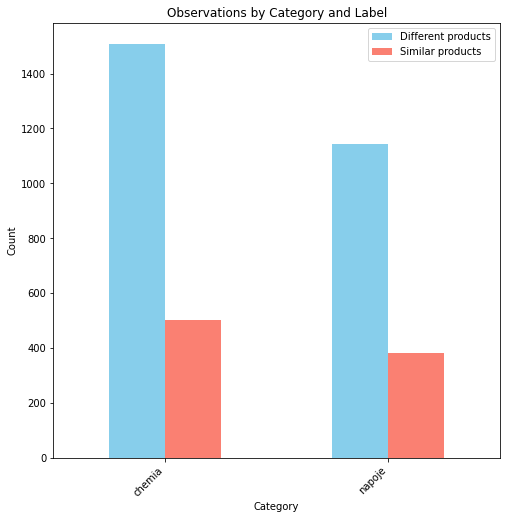

In [7]:
import matplotlib.pyplot as plt

grouped_data = plot_df.groupby(['category_left', 'label']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(8, 8))

grouped_data.plot(kind='bar', stacked=False, ax=ax, color=['skyblue', 'salmon'])

plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Observations by Category and Label')
ax.legend(['Different products', 'Similar products'])

# # Display the plot
# plt.show()

### Missing valuesa analysis

Plot showing the nuber o missing values in each column in the dataset.

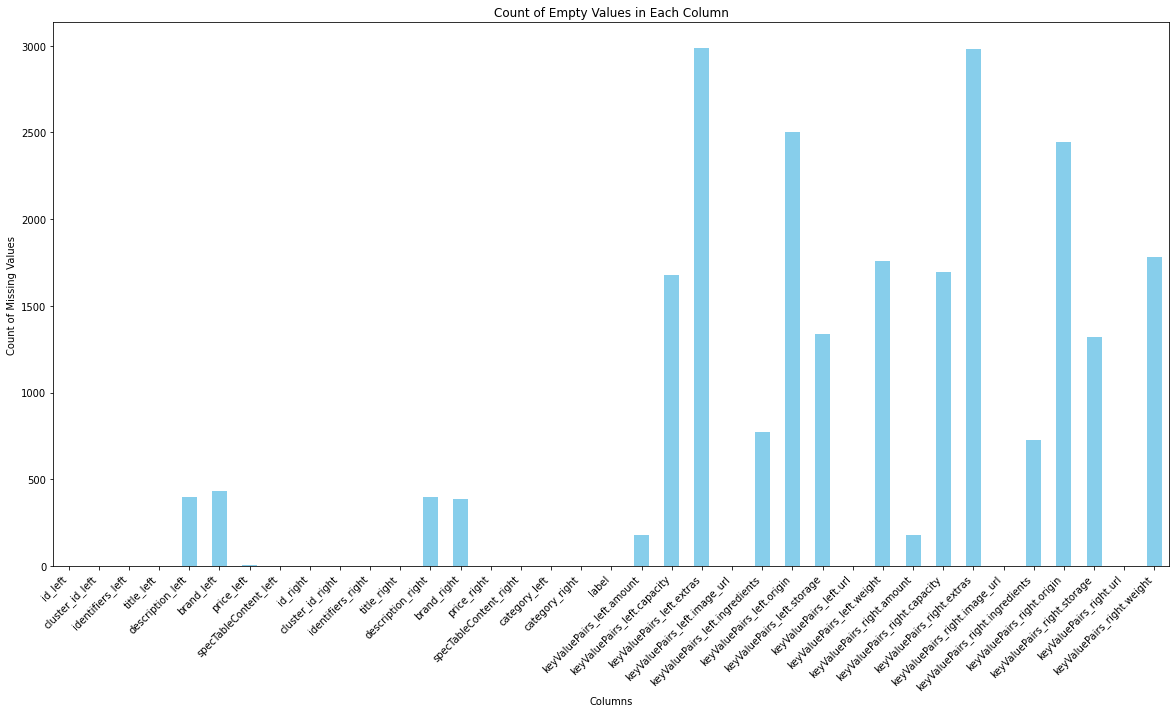

In [8]:
missing_values_count = df.isnull().sum() + (df == '').sum()

fig, ax = plt.subplots(figsize=(20, 10))
missing_values_count.plot(kind='bar', color='skyblue', ax=ax)

plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Empty Values in Each Column')
plt.show()

Two plots showing the nuber o missing values in each column in the dataset with additional division into categories (napoje and chemia)

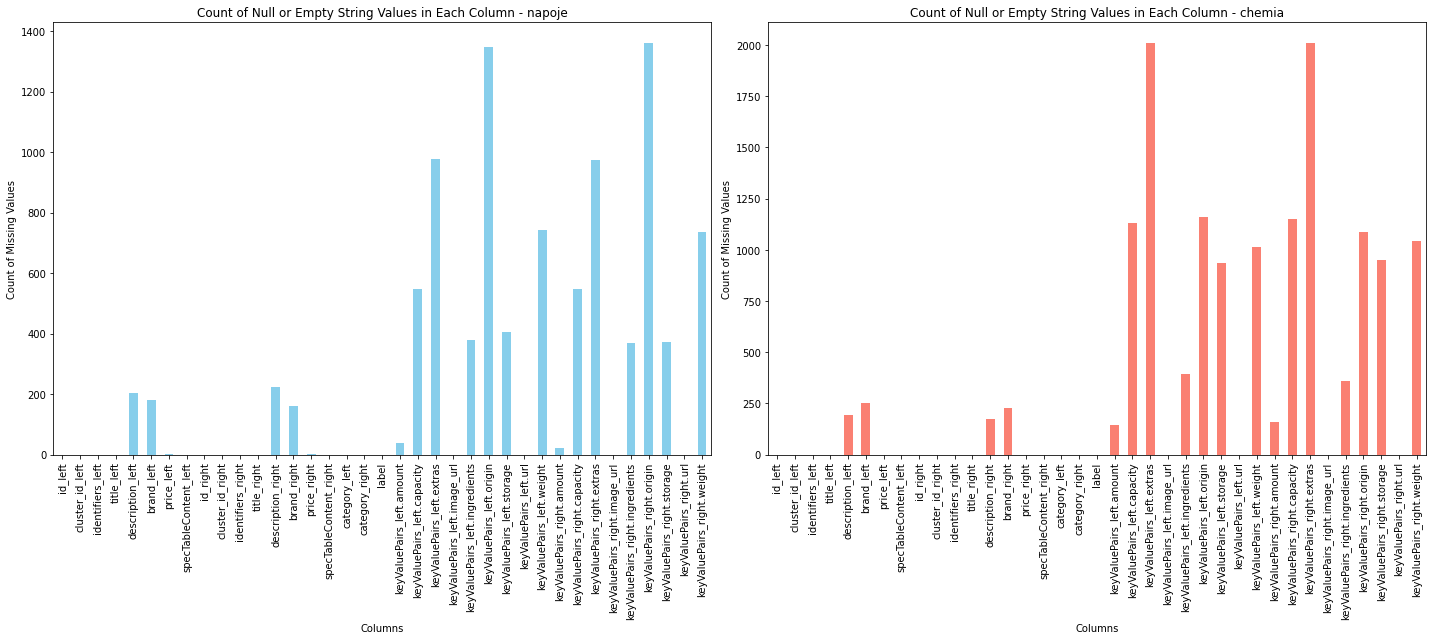

In [9]:
missing_values_count_df1 = df_nap.isnull().sum() + (df_nap == '').sum()
missing_values_count_df2 = df_ch.isnull().sum() + (df_ch == '').sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))

missing_values_count_df1.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Count of Null or Empty String Values in Each Column - napoje')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Count of Missing Values')

missing_values_count_df2.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Count of Null or Empty String Values in Each Column - chemia')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Count of Missing Values')

plt.tight_layout()
plt.show()

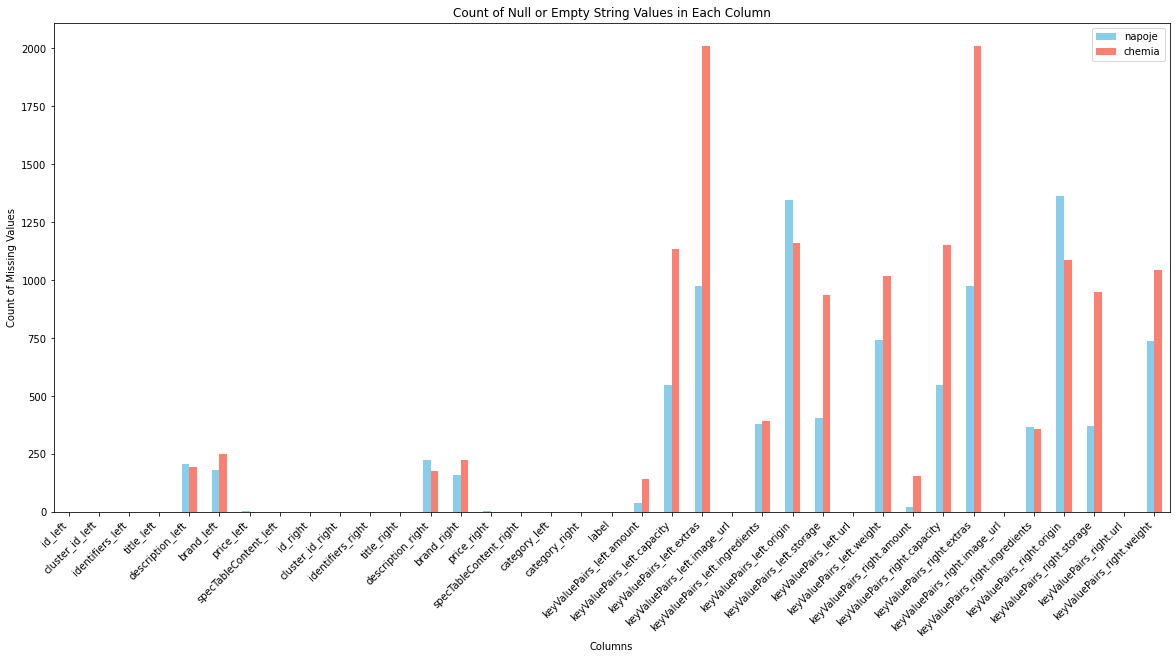

In [11]:
missing_values_count_df1 = df_nap.isnull().sum() + (df_nap == '').sum()
missing_values_count_df2 = df_ch.isnull().sum() + (df_ch == '').sum()

missing_values_counts_combined = pd.concat([missing_values_count_df1, missing_values_count_df2], axis=1, keys=['napoje', 'chemia'])

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 9))
missing_values_counts_combined.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')

plt.title('Count of Null or Empty String Values in Each Column')
plt.show()

# Unpairing the observations

For next analysis the observation were 'unpaired' - left product was separated from the right, the two dataframes undergo column names unification, got concatenated with each other and as the last step, only inque ids were chosen. It was done to achieve dataset with singular products, not pairs. 

In [5]:
df_left = df.filter(like='left')
df_right = df.filter(like='right')
df_left.columns = df_left.columns.str.replace('_left', '')
df_right.columns = df_right.columns.str.replace('_right', '')
merged_df = pd.concat([df_left, df_right])
merged_df = merged_df.drop_duplicates(subset='id', keep='first')
merged_df.head()

,id,cluster_id,identifiers,title,description,brand,price,specTableContent,category,keyValuePairs.amount,keyValuePairs.capacity,keyValuePairs.extras,keyValuePairs.image_url,keyValuePairs.ingredients,keyValuePairs.origin,keyValuePairs.storage,keyValuePairs.url,keyValuePairs.weight
0,2549,8001841376004,[{'EAN': ['8001841376004']}],lenor płyn do płukania tkanin sparkling bloom ...,płyn do płukania tkanin lenor zapewnia długotr...,lenor,14 99,amount 1 42 l capacity 1 42 l extras image_ur...,chemia,1 42 l,1 42 l,,https www frisco pl pid 119361 n lenor plyn do...,5 kationowe środki powierzchniowo czynne benz...,kraj pochodzenia czechy zapakowano w czechy,,https www frisco pl pid 119361 n lenor plyn do...,waga brutto 1471
1,6775,5900627090512,[{'EAN': ['5900627090512']}],woolite płyn do prania tkanin do kolorów z ker...,woolite płyn do prania tkanin do kolorów z ker...,,22 99,amount 3 6 l capacity 3 6 l extras image_url ...,chemia,3 6 l,3 6 l,,https www leclerc rzeszow pl resize php pic 17...,5 15 anionowe środki powierzchniowo czynne 5 n...,produkt ue,data ważności 2 lata od daty produkcji podanej...,https www leclerc rzeszow pl woolite plyn do p...,waga netto 3 6 l
2,5988,4009175947390,[{'EAN': ['4009175947390']}],frosch ecological malinowy płyn do wc 750 ml,,frosch,8 55 zł,amount 750 ml capacity extras image_url http...,chemia,750 ml,,,https leclercdrive lublin pl 149471 large_defa...,5 anionowe środki powierzchniowo czynne kompo...,niemcy,data ważności 4 lata od daty produkcji umieszc...,https leclercdrive lublin pl plyny i zele do w...,
3,6340,8001090790705,[{'EAN': ['8001090790705']}],ariel mountain spring płyn do prania 2 2l 40 prań,środek piorący w płynie ariel mountain spring ...,ariel,42 99 zł,amount 2 20 l capacity extras image_url http...,chemia,2 20 l,,,https leclercdrive lublin pl 154577 large_defa...,5 15 anionowe środki powierzchniowo czynne 5 n...,francja,,https leclercdrive lublin pl plyny do prania 1...,
4,6310,9000101367775,[{'EAN': ['9000101367775']}],e żel do prania 3 00 l 60 prań,,e,32 99 zł,amount 3 00 l capacity extras image_url http...,chemia,3 00 l,,,https leclercdrive lublin pl 153844 large_defa...,5 15 anionowe środki powierzchniowo czynne 5 n...,,najlepiej zużyć przed upływem 3 lat od daty pr...,https leclercdrive lublin pl plyny do prania 1...,


### Analysing title lengths

Simple histogram showing the distribution of titles length (in words).

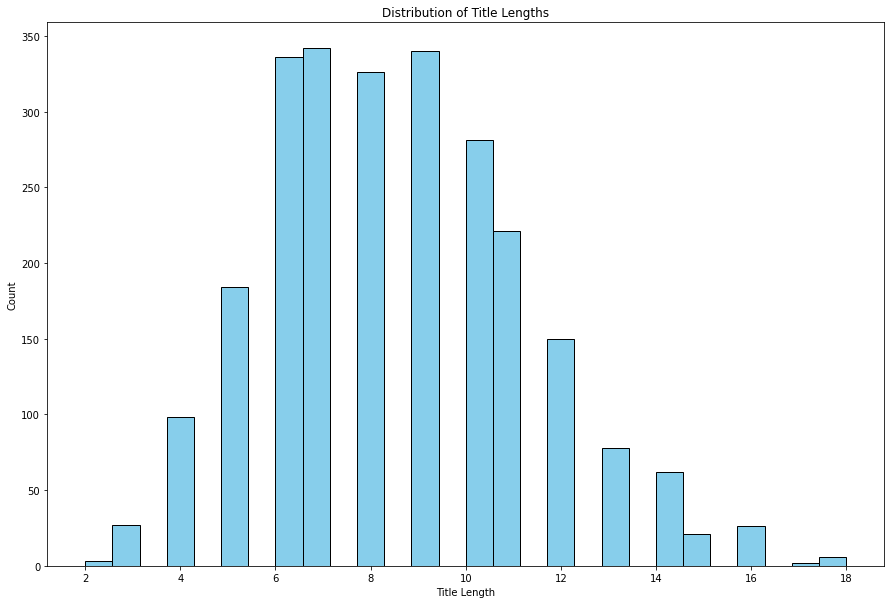

In [8]:
# df['title_length'] = df['title'].apply(len)
plt.figure(figsize=(15, 10))
plt.hist(merged_df['title'].str.split().apply(len), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.title('Distribution of Title Lengths')
plt.show()

### Analysing description lengths

Simple histogram showing the distribution of description length (in words).

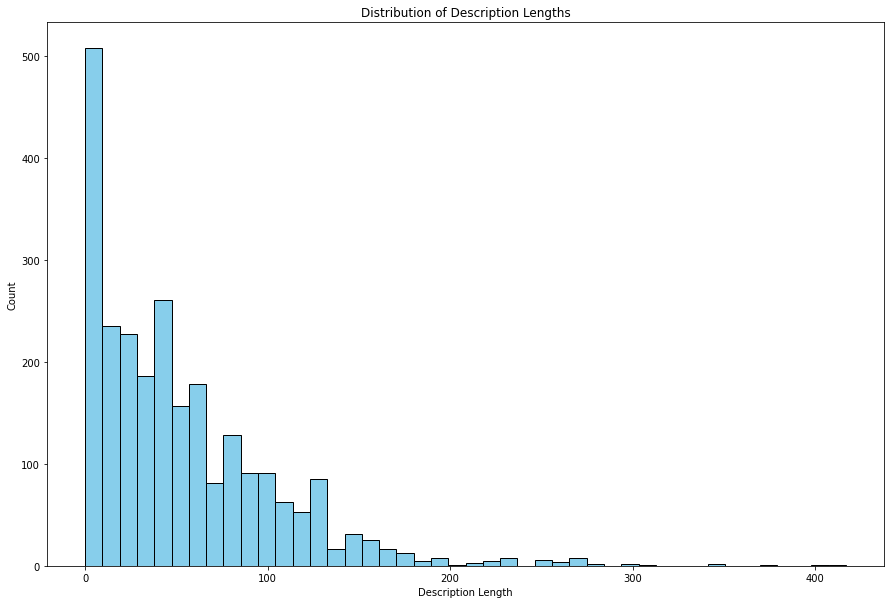

In [9]:
# df['title_length'] = df['title'].apply(len)
plt.figure(figsize=(15, 10))
plt.hist(merged_df['description'].str.split().apply(len), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.title('Distribution of Description Lengths')
plt.show()

### Relationship between title and description length

A scatter plot trying to find a relationship between tile and descripton length (in words).

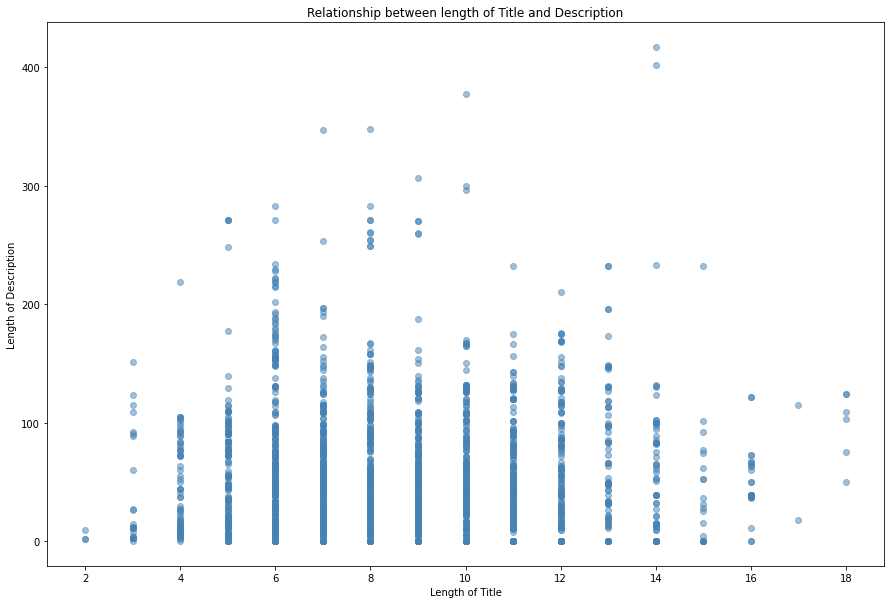

In [13]:
plt.figure(figsize=(15, 10))
plt.scatter(merged_df['title'].str.split().apply(len), merged_df['description'].str.split().apply(len), color='steelblue',alpha=.5,  marker='o', label='Data Points')
plt.xlabel('Length of Title')
plt.ylabel('Length of Description')
plt.title('Relationship between length of Title and Description')
plt.show()

# Amount of information carried by each variable - average length 

As the idea for trying to measure amount of infornation carried by each variable, the value of avarage length (in words) of the columns content was proposed. This metric may seem a bit naive, but it is just an idea for the first experiments with the data.

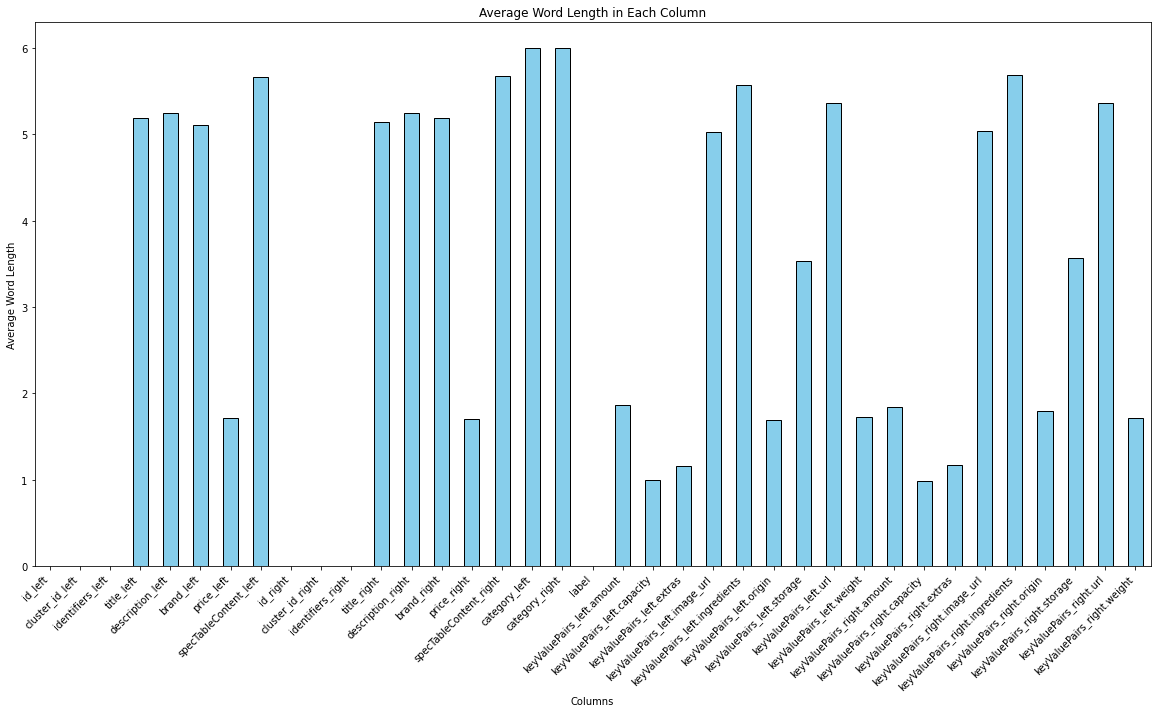

In [10]:
def average_word_length(value):
    if pd.notna(value) and isinstance(value, str):
        words = value.split()
        return sum(len(word) for word in words) / len(words) if len(words) > 0 else 0
    return 0

average_lengths = df.applymap(average_word_length).mean()

plt.figure(figsize=(20, 10))
average_lengths.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Columns')
plt.ylabel('Average Word Length')
plt.xticks(rotation=45, ha='right')
plt.title('Average Word Length in Each Column')

plt.show()

In [11]:
merged_nap = merged_df[merged_df['category'] == 'napoje']
merged_ch = merged_df[merged_df['category'] == 'chemia']

### Analysing the words in titles

#### napoje

A simple, fun visualisation of cloud of words for the products titles.

In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(text, title='Cloud'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='arial.ttf').generate(text)

    plt.figure(figsize=(18, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.title(title)

    plt.show()

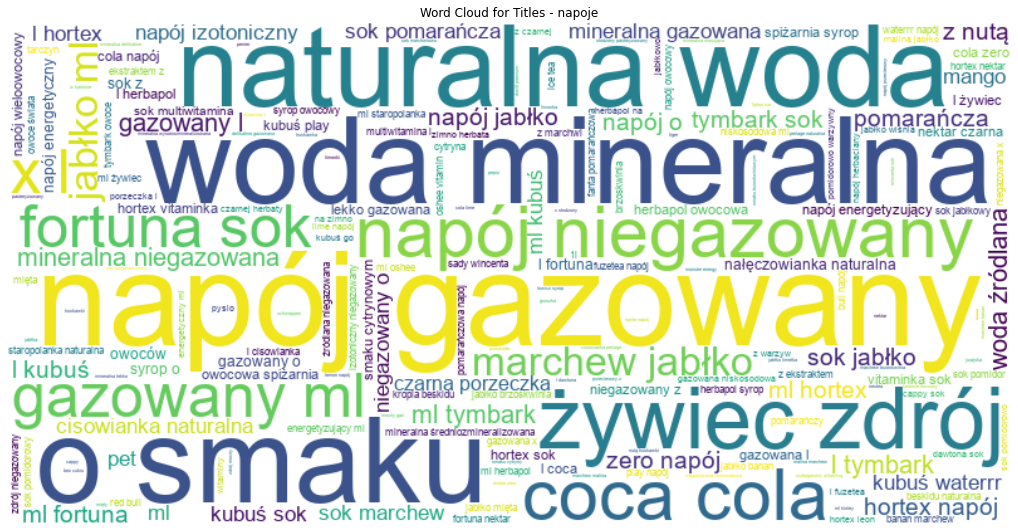

In [13]:
text = ' '.join(merged_nap['title'].astype(str))
plot_cloud(text, 'Word Cloud for Titles - napoje')

A barchart showing the number of occurences of each word in all of the titles. For clarity, words thats occured less than the set number of times (*thres* argument) and word with length 1 were filtered out.

In [14]:
from collections import Counter

def plot_word_count(text, thres, title):

    words = text.split()
    word_counts = Counter(words)
    filtered_word_counts = {word: count for word, count in word_counts.items() if count >= thres and len(word) > 1}

    sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))
    words_to_plot = list(sorted_word_counts.keys())
    counts_to_plot = list(sorted_word_counts.values())

    plt.figure(figsize=(18, 10))
    plt.bar(words_to_plot, counts_to_plot, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Display the plot
    plt.show()

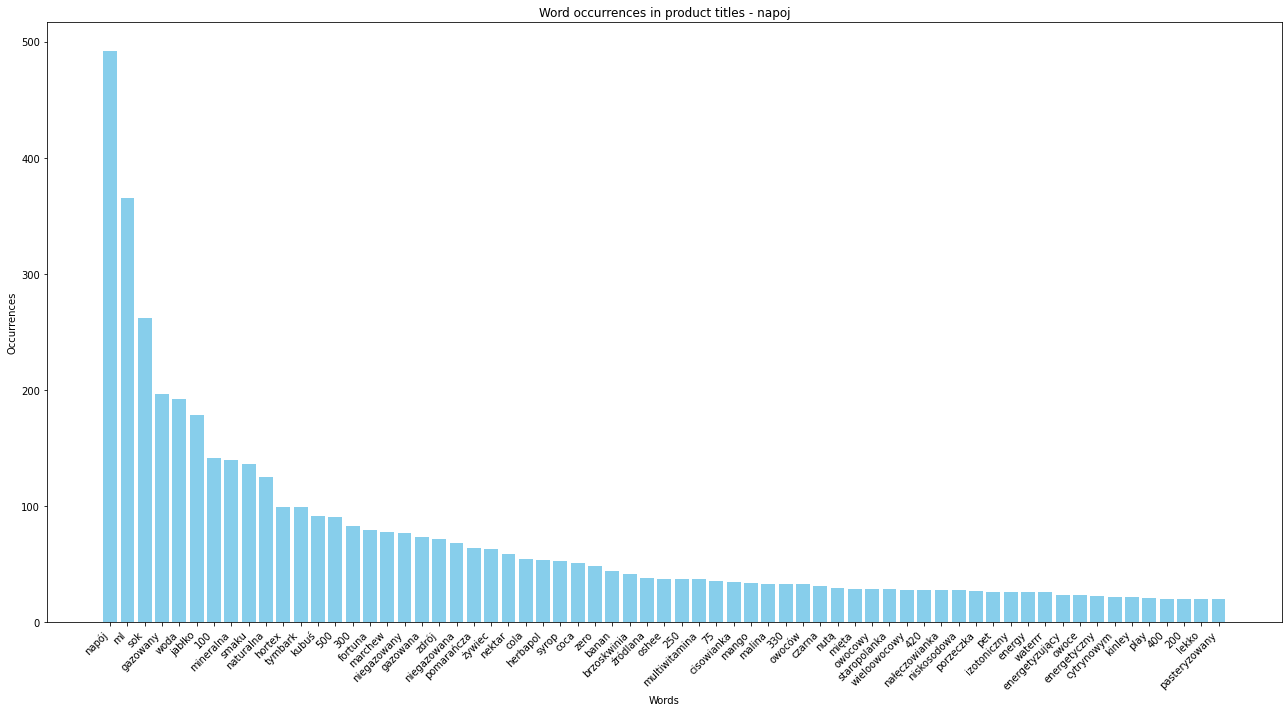

In [15]:
plot_word_count(text, 20, 'Word occurrences in product titles - napoj')

The same two visualation as the above were run on the *chemia* category.

#### chemia

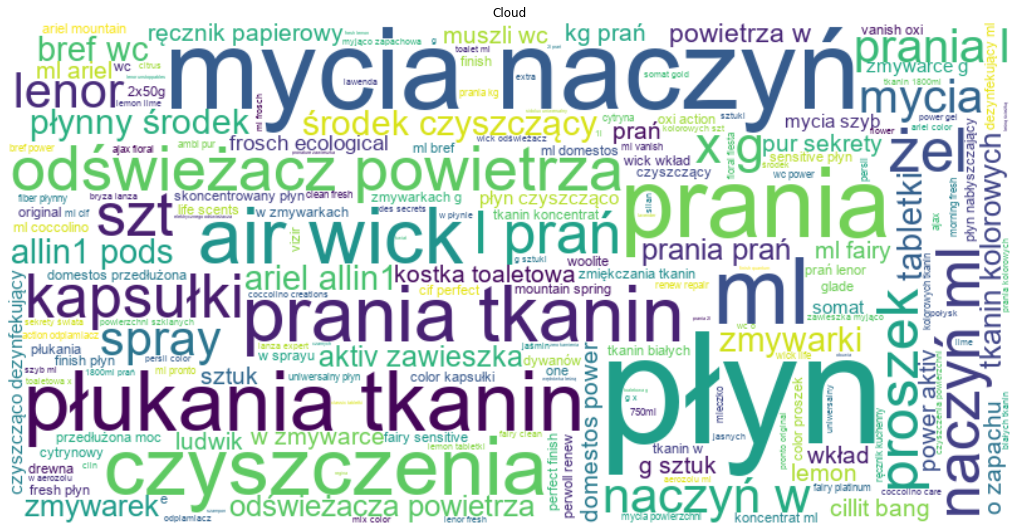

In [16]:
text = ' '.join(merged_ch['title'].astype(str))
plot_cloud(text)

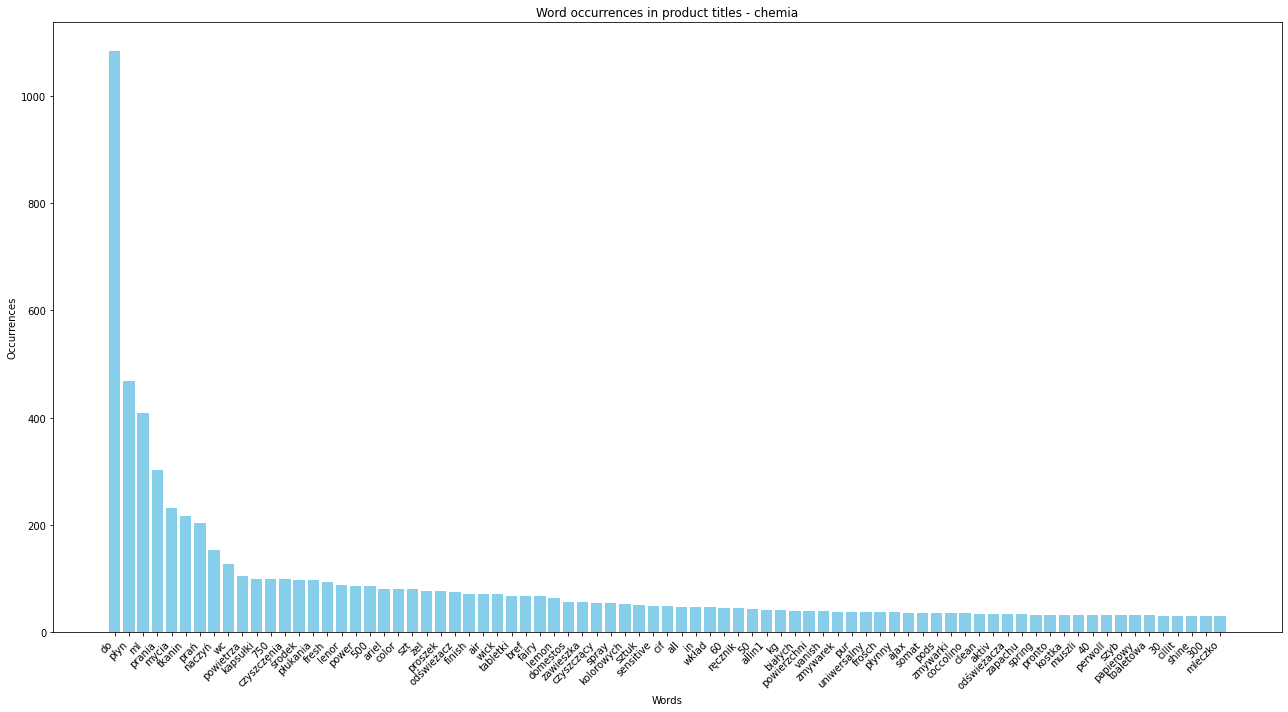

In [17]:
plot_word_count(text, 30, 'Word occurrences in product titles - chemia')

### Analysing the words in description

The same plot as the one above (occurences of each word in all titles) was created for descriptions in both categories.

#### napoje

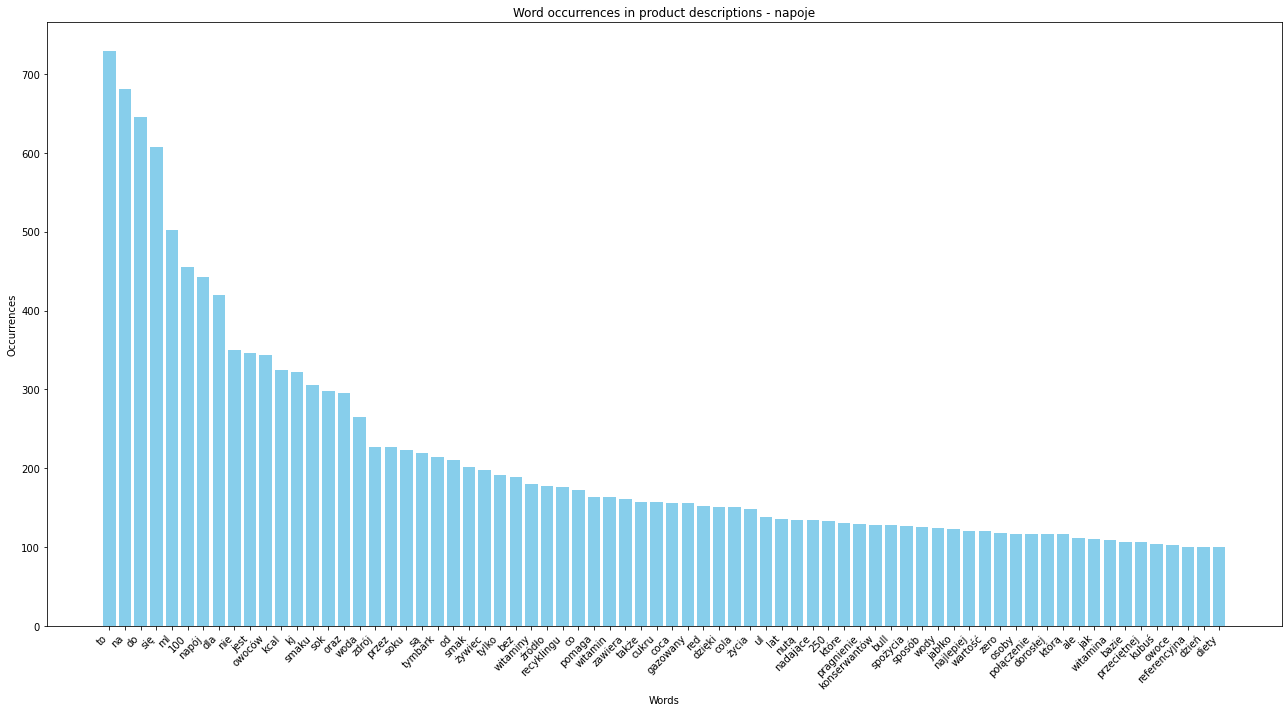

In [18]:
from collections import Counter

text = ' '.join(merged_nap['description'].astype(str))
plot_word_count(text, 100, 'Word occurrences in product descriptions - napoje')

#### chemia

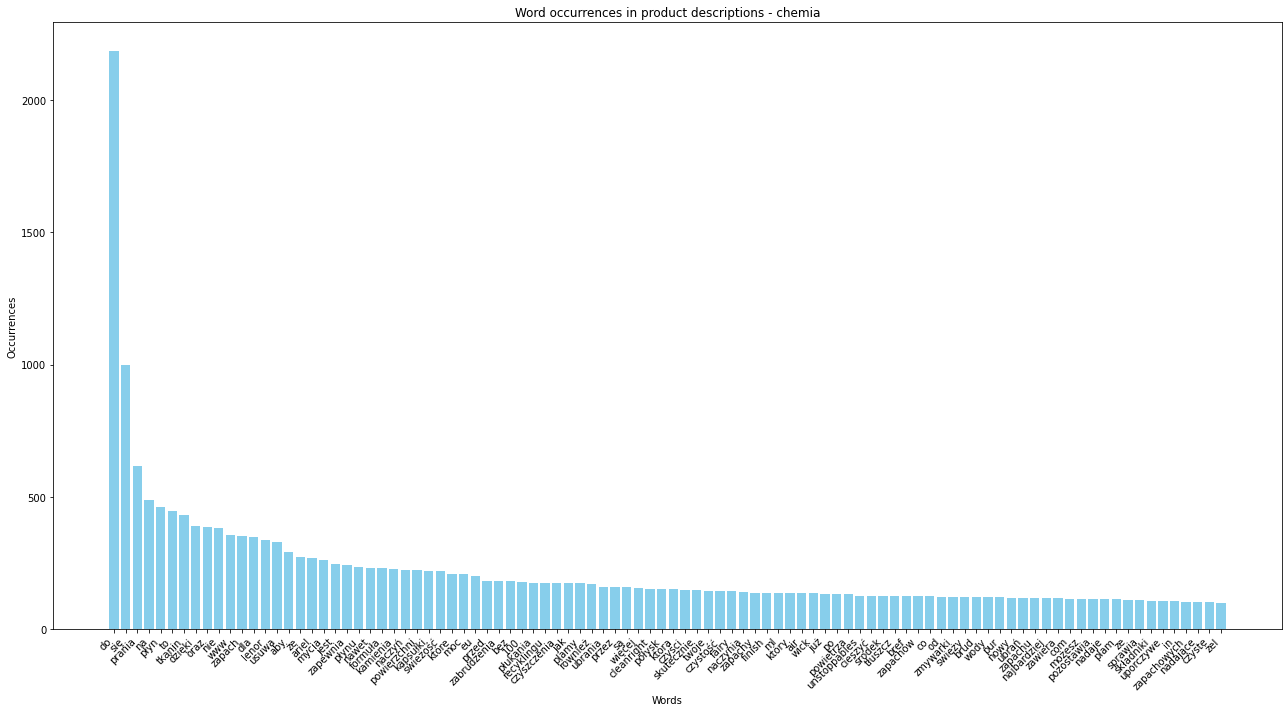

In [20]:
text = ' '.join(merged_ch['description'].astype(str))
plot_word_count(text, 100, 'Word occurrences in product descriptions - chemia')

# Pairs analysis

Now we are back to analysing the products in pairs - just like in the original dataset.

In [21]:
# Function to calculate word overlap percentage
def word_overlap_percentage(row, column='title'):
    words_left = set(row[f'{column}_left'].split())
    words_right = set(row[f'{column}_right'].split())
    if len(words_left.union(words_right)) > 0 :
        overlap_percentage = (len(words_left.intersection(words_right)) / len(words_left.union(words_right))) * 100
    else:
        overlap_percentage = None    
    return overlap_percentage

In [22]:
# Calculate word overlap percentage for each row
df_1 = df[df['label'] == 1]
overlap_1 = df_1.apply(word_overlap_percentage, axis=1, column='title')
df_0 = df[df['label'] == 0]
overlap_0 = df_0.apply(word_overlap_percentage, axis=1, column='title')


### Percentage of words overlap in titles

To try to distinguish manualy (and also out of curiosity) between the similar and different products a metric of perecentage of words overlap was proposed. It is calucated by taking two texts and then calucating how much of them overlap (*intersection*) and dividing it by the size of a set created from both texts (*union*). 

Then the distribution of these values was ploted with differenting between labels (label=0 - Differenet products, label=1 - Similar products). This was done for products titles, descriptions and table content.

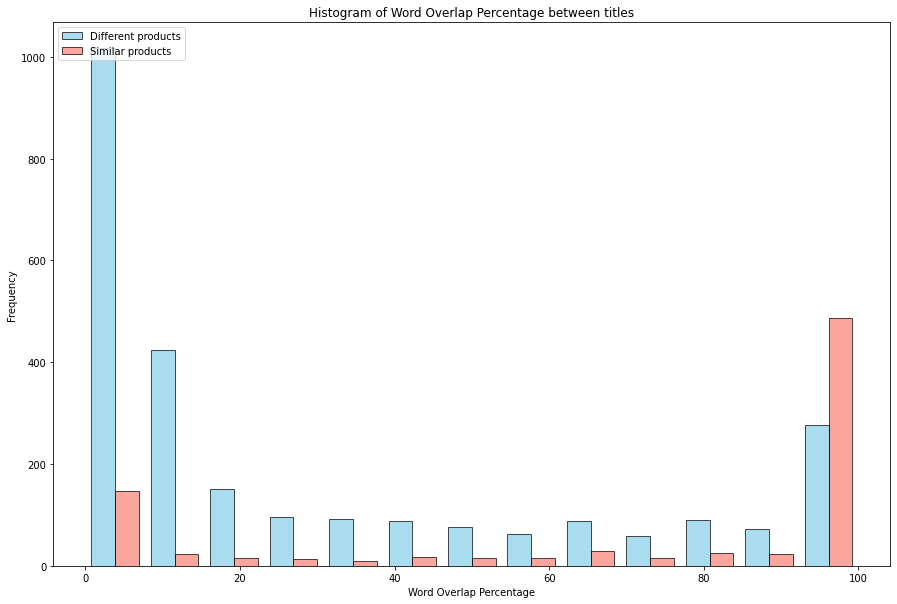

In [28]:
plt.figure(figsize=(15, 10))
plt.hist([overlap_0, overlap_1], bins='auto', color=['skyblue', 'salmon'],
         edgecolor='black', alpha=0.7, label=['Different products', 'Similar products'])

plt.xlabel('Word Overlap Percentage')
plt.ylabel('Frequency')
plt.legend(loc="upper left")

plt.title('Histogram of Word Overlap Percentage between titles')

plt.show()

### Percentage of words overlap in descriptions

In [26]:
# Calculate word overlap percentage for each row
df_1 = df[df['label'] == 1]
overlap_1 = df_1.apply(word_overlap_percentage, axis=1, column='description')
overlap_1 = [i for i in overlap_1 if i is not None]

df_0 = df[df['label'] == 0]
overlap_0 = df_0.apply(word_overlap_percentage, axis=1, column='description')
overlap_0 = [i for i in overlap_0 if i is not None]


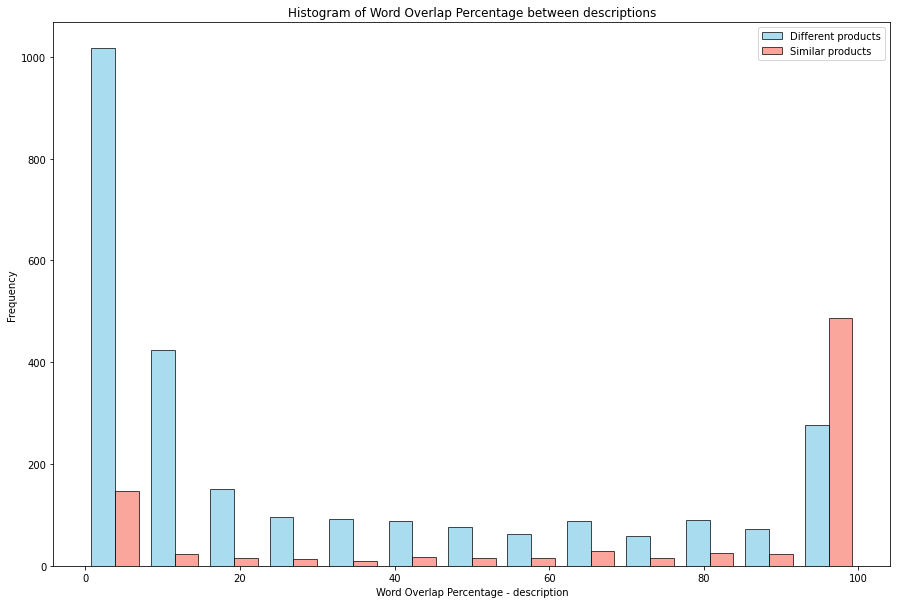

In [29]:
plt.figure(figsize=(15, 10))
plt.hist([overlap_0, overlap_1], bins='auto', color=['skyblue', 'salmon'],
         edgecolor='black', alpha=0.7, label=['Different products', 'Similar products'])

plt.xlabel('Word Overlap Percentage - description')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title('Histogram of Word Overlap Percentage between descriptions')

plt.show()

### Percentage of words overlap in table content

Spec Table Content was provided in the dataset as some kind additional information of choice about the product. This value may be useful in the modelling stage.

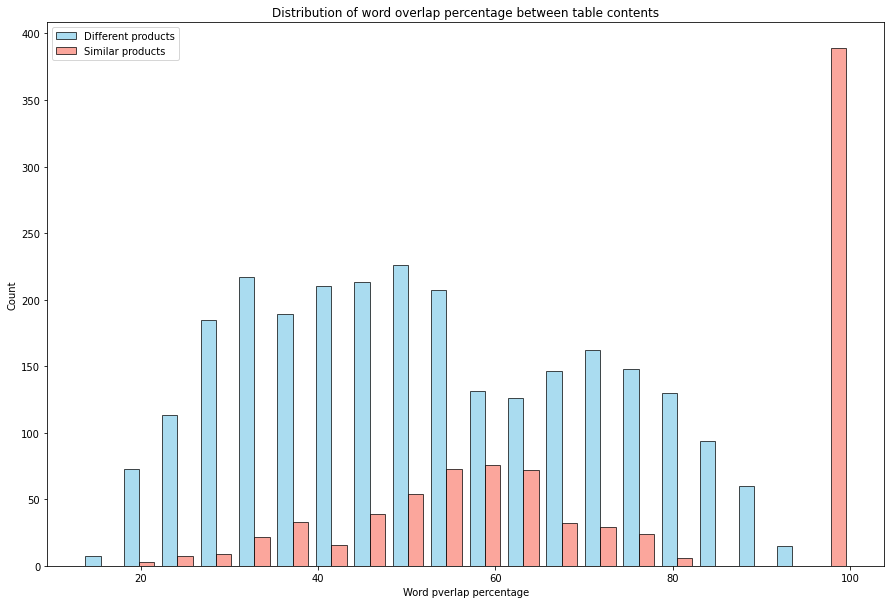

In [31]:
# Calculate word overlap percentage for each row
df_1 = df[df['label'] == 1]
overlap_1 = df_1.apply(word_overlap_percentage, axis=1, column='specTableContent')
overlap_1 = [i for i in overlap_1 if i is not None]

df_0 = df[df['label'] == 0]
overlap_0 = df_0.apply(word_overlap_percentage, axis=1, column='specTableContent')
overlap_0 = [i for i in overlap_0 if i is not None]


plt.figure(figsize=(15, 10))
plt.hist([overlap_0, overlap_1], bins='auto', color=['skyblue', 'salmon'],
         edgecolor='black', alpha=0.7, label=['Different products', 'Similar products'])

plt.xlabel('Word pverlap percentage')
plt.ylabel('Count')
plt.legend(loc="upper left")
plt.title('Distribution of word overlap percentage between table contents')

plt.show()